**Simulações de Monte Carlo**

Neste exercicio computacional, irei simular com base no modelo Monte Carlo, o preço da ação da Sabesp (SBSP3).



Upload bibliotecas

In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm
import yfinance as yf
%matplotlib inline

Upload dos dados

In [4]:
acao = 'SBSP3.SA'
data=pd.DataFrame()
data[acao]=wb.DataReader(acao, data_source='yahoo', start='2010-1-1')['Adj Close']



Analise descritiva da ação SABESP

In [5]:
data.describe()

,SBSP3.SA
count,3192.000000
mean,26.301541
std,13.538099
min,7.043702
25%,15.788023
50%,23.074312
75%,36.398110
max,62.401188


O preço médio da ação da SABESP no periodo considerado, foi de R\$ 26,30. Por sua vez, o preço maximo atingido foi de R\$ 62,40.

In [7]:
# Retornos logaritimicos

log_ret=np.log(1+data.pct_change())
log_ret.tail()

,SBSP3.SA
Date,
2022-11-07,-0.025984
2022-11-08,0.004806
2022-11-09,-0.012405
2022-11-10,-0.039970
2022-11-11,0.023539


Visualização gráfica dos preços historicos e dos retornos

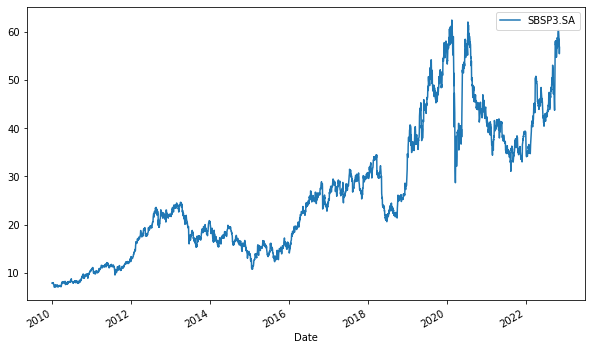

In [8]:
data.plot(figsize=(10,6))

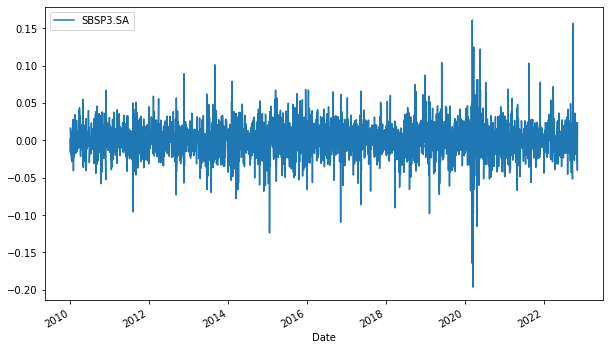

In [9]:
log_ret.plot(figsize=(10,6))

Como mostra o grafico acima dos retornos da ação da Sabesp, a distribuição dos valores seguem uma distribuição normal com uma média estável.

Calculo da média e variância do preço da SBSP3

In [11]:
# média 

u=log_ret.mean()
u

SBSP3.SA    0.000618
dtype: float64

In [12]:
# Variância

var=log_ret.var()
var

SBSP3.SA    0.000528
dtype: float64

A seguir, será calculado o *drift*, que consiste na melhor aproximação das taxas futuras de retorno de uma ação.

In [14]:
# Calculo do drift

drift=u-(0.5*var)
drift

SBSP3.SA    0.000354
dtype: float64

In [16]:
# Desvio-Padrão dos retornos logaritmicos

stdv_log_ret=log_ret.std()
stdv_log_ret

SBSP3.SA    0.022989
dtype: float64

In [18]:
# Convertendo drift e desvio-padrão em array

np.array(drift)
np.array(stdv_log_ret)

array([0.02298886])

Criando uma distribuição aleatória Z


In [19]:
Z=norm.ppf(np.random.rand(10,2))

Calculo para simular os retornos diarios do retorno da ação

In [20]:
# intervalos e n° de iterações

intervalos=1000
iteracoes=10

In [23]:
# Retornos diários

ret_diarios= np.exp(drift.values+stdv_log_ret.values*norm.ppf(np.random.rand(intervalos, iteracoes)))

ret_diarios

array([[1.02316598, 1.01984714, 0.97616613, ..., 1.0079745 , 1.01609402,
        0.96625345],
       [1.04893487, 1.00733981, 1.00593635, ..., 1.02449978, 0.97018735,
        1.0030091 ],
       [0.97143853, 0.98820458, 0.99532566, ..., 1.00163211, 1.00630618,
        1.03088412],
       ...,
       [1.03602209, 1.0162864 , 0.97070142, ..., 0.96893077, 0.95779976,
        0.99794194],
       [1.03074067, 1.04762503, 1.0322807 , ..., 1.01025116, 1.0096877 ,
        0.9963509 ],
       [0.99819132, 0.97743063, 1.04463227, ..., 0.9998026 , 1.00339484,
        0.98056086]])

In [26]:
# Obtendo o preço corrente do ultimo dia de fechamento da ação da Sabesp

S0=data.iloc[-1]

In [31]:
# Matriz de retornos

vet_ret=np.zeros_like(ret_diarios)

vet_ret[0]=S0

for p in range(1,intervalos):
  vet_ret[p]=vet_ret[p-1]*ret_diarios[p]

vet_ret

array([[ 56.74000168,  56.74000168,  56.74000168, ...,  56.74000168,
         56.74000168,  56.74000168],
       [ 59.51656603,  57.1564627 ,  57.07683044, ...,  58.13011922,
         55.04843181,  56.91073789],
       [ 57.81668556,  56.48227849,  56.81003389, ...,  58.22499388,
         55.39557695,  58.66837597],
       ...,
       [ 22.36414356, 243.78998195,  83.33768772, ...,  56.26228079,
         94.14037564,  56.35559669],
       [ 23.05163225, 255.40048793,  86.02788677, ...,  56.8390347 ,
         95.05237898,  56.14994948],
       [ 23.00993912, 249.63626038,  89.86750627, ...,  56.82781444,
         95.37506653,  55.05844293]])

Visualização gráfica das simulações de Monte Carlo

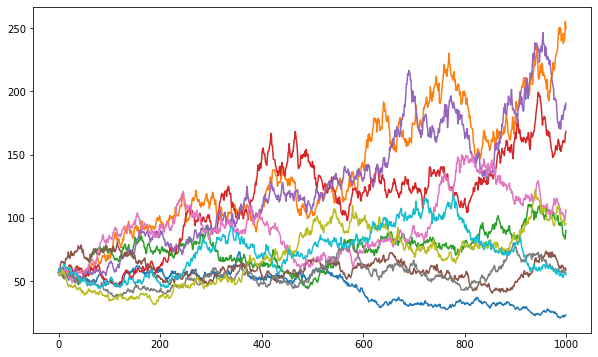

In [33]:
plt.figure(figsize=(10,6))
plt.plot(vet_ret)